# PROCESS

In this section I will complete the following key tasks: 1. Check the data for errors. 2. Transform the data so I can work with it effectively. 3. Document the cleaning process.

## 3.1 Contents

In this section I will complete the following key tasks:
    1. Check the data for errors.
    2. Transform the data so I can work with it effectively.
    3. Document the cleaning process.

## 3.2 Introduction

The loaded DataFrame has 12 columns with 5,682,196 entries. In this section I will clean the dataset.

## 3.3 Imports

In [177]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 3.4 Load Data

In [178]:
df = pd.read_csv('df_cyclistic_prepared.csv')

In [179]:
# Review 'df'  info. Check column names against datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682196 entries, 0 to 5682195
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 563.6+ MB


In [180]:
len(df)

5682196

'started_at' and 'ended_at' columns currently object dtype. Convert to datetime to do calculations more efficiently.

In [181]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".289", at position 1694242. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Threw ValueError when trying to convert 'started_at' and 'ended_at' to datetime. Investigate problemativ row(s).

In [182]:
# investigate problematic rows - 'started_at' does not conform to datetime format
problem_row = df.loc[1694242]
print(problem_row)

ride_id                      CDE6023BE6B11D2F
rideable_type                   electric_bike
started_at            2024-06-11 17:20:06.289
ended_at              2024-06-11 17:21:39.464
start_station_name                        NaN
start_station_id                          NaN
end_station_name                          NaN
end_station_id                            NaN
start_lat                               41.89
start_lng                              -87.65
end_lat                                 41.89
end_lng                                -87.65
member_casual                          casual
Name: 1694242, dtype: object


I can see this row has fractional seconds in 'started_at' and 'ended_at' columns. This will interfere with conversion to datetime dtype.

In [184]:
# count observations with fractional seconds in 'started_at'
count_frxnal_seconds = df['started_at'].str.contains(r'\.\d+').sum()
print(f"Number of observations with fractional seconds in 'started_at' column: {count_frxnal_seconds}")

Number of observations with fractional seconds in 'started_at' column: 3987954


In [185]:
# ratio of dataset that has fractional seconds
ratio_frxnal_seconds = count_frxnal_seconds/(len(df))*100
print(f"Percent of dataset with fractional seconds: {ratio_frxnal_seconds}")

Percent of dataset with fractional seconds: 70.18332348972123


70% of the dataset has fractional seconds. Therefore, I cannot easily convert 'started_at' and 'ended_at' columns to datetime format. I will add .000 to the end of the 30% of the 'started_at'/'ended_at' that did not have fractional seconds and round.

***For the purposes of this analysis this type of precision is not necessary. Removing the fractional seconds then converting to datetime would have sufficed.

In [186]:
def add_fractional_seconds(df):
    """
    Adds '.000' to timestamps in 'started_at' and 'ended_at' columns that do not alread have fractional seconds.
    
    Args:
        df: The pandas DataFrame
        
    Returns:
        The DataFrame with modified timestamps.
    """
    
    df['started_at'] = df['started_at'].apply(lambda x: x+'.000' if not '.' in x else x)
    df['ended_at'] = df['ended_at'].apply(lambda x: x+'.000' if not '.' in x else x)
    return df

#re-establish dfb
df = add_fractional_seconds(df)

Now convert 'started_at' and 'ended_at' to datetime.

In [187]:
# convert 'started_at' and 'ended_at' columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

Review DataFrame

In [188]:
# calculate and create a column called 'ride_length'
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682196 entries, 0 to 5682195
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 563.6+ MB


Check for null values in all columns

In [189]:
# count number of null values in each column
null_counts = df.isnull().sum()

# calculate the % of null values in each column
null_percents = (null_counts/len(df)) * 100

# create a DataFrame to display results
null_summary = pd.DataFrame({'Null Count': null_counts,
                            'Null Percentage': null_percents.round(2)})

# print results
print("Null Value Summary:\n", null_summary)

Null Value Summary:
                     Null Count  Null Percentage
ride_id                      0             0.00
rideable_type                0             0.00
started_at                   0             0.00
ended_at                     0             0.00
start_station_name     1044760            18.39
start_station_id       1044760            18.39
end_station_name       1073877            18.90
end_station_id         1073877            18.90
start_lat                    0             0.00
start_lng                    0             0.00
end_lat                   7101             0.12
end_lng                   7101             0.12
member_casual                0             0.00


'end_lat' and 'end_lng' columns have null values in 0.12% of rows. Not statistically significant. I will drop these.

In [190]:
# drop rows containing null values in 'end_lat' and 'end_lng' columns
df = df.dropna(subset=['end_lat', 'end_lng'])
print(df.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1044760
start_station_id      1044760
end_station_name      1066776
end_station_id        1066776
start_lat                   0
start_lng                   0
end_lat                     0
end_lng                     0
member_casual               0
dtype: int64


In [191]:
null_counts.info()

<class 'pandas.core.series.Series'>
Index: 13 entries, ride_id to member_casual
Series name: None
Non-Null Count  Dtype
--------------  -----
13 non-null     int64
dtypes: int64(1)
memory usage: 764.0+ bytes


#### Note: (This next section I can probably delete, not relevant to work moving forward.) The start/end station columns have a significant # of nulls values (~20% of rows). The following work is me trying to determine if the lat and lng data was precise enough to replace station name/id info (lat/lng gets more precise with more decimal points on the coordinate).

In [192]:
def count_decimal_places(df, col_name):
  """
  Counts the number of observations with each amount of decimal places 
  in the specified column of a DataFrame.

  Args:
    df: The pandas DataFrame.
    col_name: The name of the column to analyze.

  Returns:
    A pandas Series containing the counts of observations for each 
    number of decimal places.
  """

  # Extract the decimal part of the column
  decimal_parts = df[col_name].astype(str).str.split('.').str[1] 

  # Handle cases where there are no decimal places
  decimal_parts = decimal_parts.fillna('') 

  # Count the number of decimal places for each observation
  decimal_place_counts = decimal_parts.str.len() 

  # Count the occurrences of each decimal place count
  decimal_place_counts = decimal_place_counts.value_counts()

  return decimal_place_counts

# Assuming 'df' is your DataFrame
start_lat_decimal_counts = count_decimal_places(df, 'start_lat')
end_lat_decimal_counts = count_decimal_places(df, 'end_lat')

start_lng_decimal_counts = count_decimal_places(df, 'start_lng')
end_lng_decimal_counts = count_decimal_places(df, 'end_lng')


print("Decimal Place Counts for 'start_lat':\n", start_lat_decimal_counts)
print("\nDecimal Place Counts for 'end_lat':\n", end_lat_decimal_counts)

print("Decimal Place Counts for 'start_lng':\n", start_lng_decimal_counts)
print("\nDecimal Place Counts for 'end_lng':\n", end_lng_decimal_counts)

Decimal Place Counts for 'start_lat':
 start_lat
6     2126737
2      936765
9      741556
14     540994
11     289371
5      257011
15     163179
8      132154
10     122541
7      122479
1      107999
13      91300
4       42485
12        364
3         160
Name: count, dtype: int64

Decimal Place Counts for 'end_lat':
 end_lat
6     2635945
2      956626
14     572520
11     360895
5      332355
15     163199
10     152161
13     110333
1      110150
7      102100
8       72748
4       52918
9       52396
12        496
3         253
Name: count, dtype: int64
Decimal Place Counts for 'start_lng':
 start_lng
6     2007678
2      998002
9      725207
14     724408
10     423322
5      323268
8      161715
7      108763
13      74719
4       69639
1       46760
3       11614
Name: count, dtype: int64

Decimal Place Counts for 'end_lng':
 end_lng
6     2492149
2     1018481
14     753292
10     523836
5      411040
8      107357
13      93262
4       90419
7       83584
1       48295
9   

In [193]:
# decided that for this analysis lat/lng data is sufficient, station name/id is not needed. Therefore I will drop 4 colummns: start_station_name, start_station_id, end_station_name, end_station_id
df = df.drop(columns=['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'])

One last check for nulls in 'df'.

In [194]:
print(df.isnull().sum())

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
dtype: int64


No nulls in DataFrame. Next, I will check for duplicates.

In [195]:
# find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

In [196]:
# count the number of duplicate rows
num_duplicates = len(duplicate_rows)

# calculate percentage duplicates make up of dataset 
percent_duplicates = num_duplicates / len(df) * 100

print(f"Number of duplicate rows: {num_duplicates}")
print(f"% of dataset that are duplicates: {percent_duplicates}")

Number of duplicate rows: 0
% of dataset that are duplicates: 0.0


#### Note: During my first attempt, 10% of the dataset was duplicate rows. They all appeared to be in August. Upon further investigation, I realized that I had uploaded the August csv twice and did not load the September csv from raw data. Below are the steps I took to investigate and resolve the issue. 

#### Again, not relevant to this notebook, but keeping for now for my own learning purposes.

duplicate_rows.groupby(['ride_id'])
print(duplicate_rows.groupby(['ride_id']).head(20))

check for duplicates
find duplicate rows based on ride_id column
duplicate_ride_ids = df['ride_id'].duplicated(keep=False)

filter the DataFrame to include only rows with duplicate 'ride_id'
rows_with_duplicate_ride_ids = df[duplicate_ride_ids]

sort the duplicate rows by 'ride_id'
rows_with_duplicate_ride_ids = rows_with_duplicate_ride_ids.sort_values(by='ride_id')

print the sorted duplicate rows
print(rows_with_duplicate_ride_ids)

rows_with_duplicate_ride_ids.info()

rows_with_duplicate_ride_ids.groupby(['ride_id'])
print(rows_with_duplicate_ride_ids.head())

rows_with_duplicate_ride_ids.groupby(['ride_id'])
print(rows_with_duplicate_ride_ids.tail())

example_duplicate = df[df['ride_id'] == '00001004F8DF01C8']

print the selected rows
print(example_duplicate)

All duplicates seem to be in the month of August. Checking imported dfs to make sure August was not somehow uploaded twice.

df8.info()
df8.head()

print(len(df8))

columns 10 (end_lat) and 11 (end_lng) have 754612 non-null values --> the same as number of duplicates listed. Must be a code error.

Error identified in cell 20: original import brought in august twice and no september. Fixed.

Next, I will calculate the ride length by subtracting 'started_at' from 'ended_at' and add this data as a new column called 'ride_length'.

In [197]:
# calculate ride length and add new column to dataframe

df['ride_length'] = (df['ended_at'] - df['started_at'])
print(df.head())

            ride_id  rideable_type          started_at            ended_at  \
0  C1D650626C8C899A  electric_bike 2024-01-12 15:30:27 2024-01-12 15:37:59   
1  EECD38BDB25BFCB0  electric_bike 2024-01-08 15:45:46 2024-01-08 15:52:59   
2  F4A9CE78061F17F7  electric_bike 2024-01-27 12:27:19 2024-01-27 12:35:19   
3  0A0D9E15EE50B171   classic_bike 2024-01-29 16:26:17 2024-01-29 16:56:06   
4  33FFC9805E3EFF9A   classic_bike 2024-01-31 05:43:23 2024-01-31 06:09:35   

   start_lat  start_lng    end_lat    end_lng member_casual     ride_length  
0  41.903267 -87.634737  41.889177 -87.638506        member 0 days 00:07:32  
1  41.902937 -87.634440  41.889177 -87.638506        member 0 days 00:07:13  
2  41.902951 -87.634470  41.889177 -87.638506        member 0 days 00:08:00  
3  41.884295 -87.633963  41.921822 -87.644140        member 0 days 00:29:49  
4  41.948797 -87.675278  41.889177 -87.638506        member 0 days 00:26:12  


In [198]:
# calculate day_of_week and add column to dataframe
df['day_of_week'] = df['started_at'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,41.903267,-87.634737,41.889177,-87.638506,member,0 days 00:07:32,Friday
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,41.902937,-87.634440,41.889177,-87.638506,member,0 days 00:07:13,Monday
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,41.902951,-87.634470,41.889177,-87.638506,member,0 days 00:08:00,Saturday
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,41.884295,-87.633963,41.921822,-87.644140,member,0 days 00:29:49,Monday
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,41.948797,-87.675278,41.889177,-87.638506,member,0 days 00:26:12,Wednesday


I've now added a 13th column called 'ride_length'. Next I will check that the values in each column make sense. Eg, checking the the values in 'member_casual' are only 'member' or 'casual'; checking that all values in 'ride_length' are positive values; etc.

In [199]:
df.shape

(5675095, 11)

Column0: ride_id

Column1: 'rideable_type'

In [200]:
# Get unique values in 'rideable_type' column
unique_rideable_types = df['rideable_type'].unique()

# Print the unique values
print(unique_rideable_types)

['electric_bike' 'classic_bike' 'electric_scooter']


Column4: 'start_lat'

In [201]:
# Find the minimum and maximum values in the 'start_lat' column
min_start_lat = df['start_lat'].min()
max_start_lat = df['start_lat'].max()

print(min_start_lat)
print(max_start_lat)

41.64
42.07


Column5: 'start_lng'

In [202]:
# Find the minimum and maximum values in the 'start_lng' column
min_start_lng = df['start_lng'].min()
max_start_lng = df['start_lng'].max()

print(min_start_lng)
print(max_start_lng)

-87.91
-87.52


Column6: 'end_lat'

In [203]:
# Find the minimum and maximum values in the 'end_lat' column
min_end_lat = df['end_lat'].min()
max_end_lat = df['end_lat'].max()

print(min_end_lat)
print(max_end_lat)

16.06
87.96


Both min and max 'end_lat' look like an errors. Investigate.

In [204]:
# Count number of 'end_lat' values below 40.00
count_lo_end_lat = (df['end_lat'] < 40.00).sum()
perc_lo_end_lat = count_lo_end_lat/len(df)


# Print the court
print(f"Number of 'end_lat' values below 40:00: {count_lo_end_lat}")
print(f"% of rows with 'end_lat' values below 40.00: {perc_lo_end_lat}")

Number of 'end_lat' values below 40:00: 12
% of rows with 'end_lat' values below 40.00: 2.1145020479833377e-06


0.000002 % of the dataset has 'end_lat' value < 40.00. I will investigate these rows, but likely will drop.

In [205]:
# Find the rows with 'end_lat' less than 40
min_end_lat_outlier = df[df['end_lat'] < 40.00]

# Print the rows
print(min_end_lat_outlier)

                  ride_id  rideable_type              started_at  \
3160362  992C14C6CE573FD5  electric_bike 2024-08-19 15:50:59.229   
3183654  11CDEC2D64D92CCD  electric_bike 2024-08-18 11:06:51.460   
3255867  37B6F0FE3764406C  electric_bike 2024-08-10 07:33:20.129   
3257100  CDB1A7C5C2E003B0  electric_bike 2024-08-25 10:41:26.389   
3788741  6443AF0A50B2CE2B  electric_bike 2024-08-14 19:30:48.655   
3794537  D82766169ED55B87  electric_bike 2024-08-25 10:37:36.353   
3810382  B9D700B54FEC231D  electric_bike 2024-08-13 13:51:29.639   
3846720  85437CD6FF21E97B  electric_bike 2024-08-21 18:13:56.409   
3866602  008E882D718EDB54  electric_bike 2024-08-05 20:47:43.058   
3882653  A35B93238902E7C3  electric_bike 2024-08-23 18:54:38.298   
3927247  AC3B1B61AD56FB4D  electric_bike 2024-09-17 13:56:29.166   
4747325  D259E9F6CAD8512D  electric_bike 2024-10-06 14:53:08.948   

                       ended_at  start_lat  start_lng  end_lat  end_lng  \
3160362 2024-08-19 15:57:04.508  41.8781

Plugged these ending location coordinates into Google maps and they are nowhere near Chicago. I will drop these 11 rows.

In [206]:
# Drop the row from 'df'
df.drop(min_end_lat_outlier.index, inplace=True)

In [207]:
df.shape

(5675083, 11)

In [208]:
# Count number of 'end_lat' values above 42.20
count_hi_end_lat = (df['end_lat'] > 42.20).sum()
perc_hi_end_lat = count_hi_end_lat/len(df)


# Print the court
print(f"Number of 'end_lat' values above 42.20: {count_hi_end_lat}")
print(f"% of rows with 'end_lat' values above 42.20: {perc_hi_end_lat}")

Number of 'end_lat' values above 42.20: 20
% of rows with 'end_lat' values above 42.20: 3.524177531852838e-06


In [209]:
# Find the rows with 'end_lat' above than 42.20
max_end_lat_outlier = df[df['end_lat'] > 42.20]

# Print the rows
print(max_end_lat_outlier)

                  ride_id  rideable_type              started_at  \
2688680  BFB4AA1136202211  electric_bike 2024-07-27 17:17:18.671   
3155546  9A77507269162955  electric_bike 2024-08-07 15:13:00.012   
3195363  90D3D2DAB5B708A2  electric_bike 2024-08-09 08:56:06.836   
3799390  3522F54E76DA57A6  electric_bike 2024-08-19 18:41:10.421   
3799431  E3E458F9FDF1C9EA  electric_bike 2024-08-23 07:28:07.235   
3805645  CE839B24D653FFC6  electric_bike 2024-08-17 05:59:19.748   
3807507  E583A8FA09606F72  electric_bike 2024-08-18 15:36:16.929   
3821197  B6C7F17118123505  electric_bike 2024-08-19 19:26:40.687   
3833087  FF025E6C4E70DC6B  electric_bike 2024-08-22 09:23:07.602   
3842794  DFCC318463834193  electric_bike 2024-08-08 13:03:38.221   
3845008  B1C5E03980AE655C  electric_bike 2024-08-22 18:53:42.418   
4059077  7FB19E57BF665068  electric_bike 2024-09-03 08:53:28.741   
4535305  62DE8EEB7371193B  electric_bike 2024-09-04 18:54:23.501   
4666510  5543B576F10B7772  electric_bike 2024-09

In [210]:
# Drop the row from 'df'
df.drop(max_end_lat_outlier.index, inplace=True)

In [211]:
df.shape

(5675063, 11)

Interesting that all of these only have 2 decimal points... could investigate further.

Pause. Perhaps need to do a bit more cleaning of 'end_lat'. This analysis should focus on Chicago riders. If there are start/end locations way outside of Chicago, these should be excluded. I will generate a histogram of all values in the 'end_lat' column.

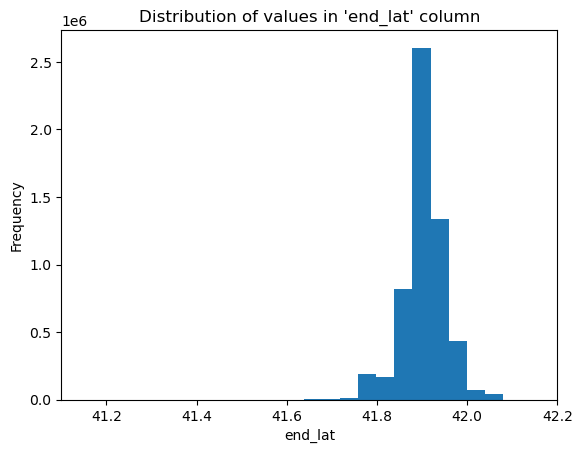

In [212]:
# Create a histogram of all values in 'end_lat' column
plt.hist(df['end_lat'], bins=50)

# Set x-axis limits
plt.xlim(41.10, 42.20)

# Set title and labels
plt.title("Distribution of values in 'end_lat' column")
plt.xlabel('end_lat')
plt.ylabel('Frequency')

# Show plot
plt.show()

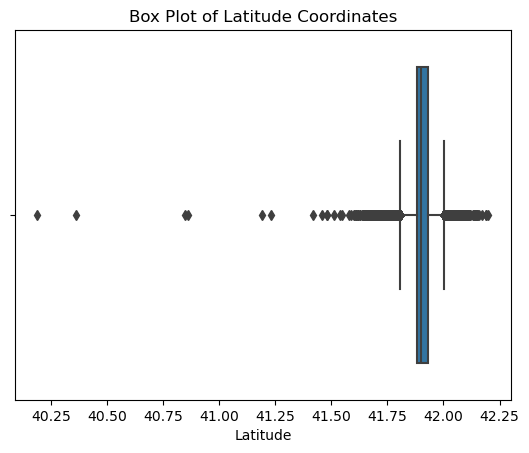

In [213]:
sns.boxplot(x=df['end_lat'])
plt.xlabel('Latitude')
plt.title('Box Plot of Latitude Coordinates')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


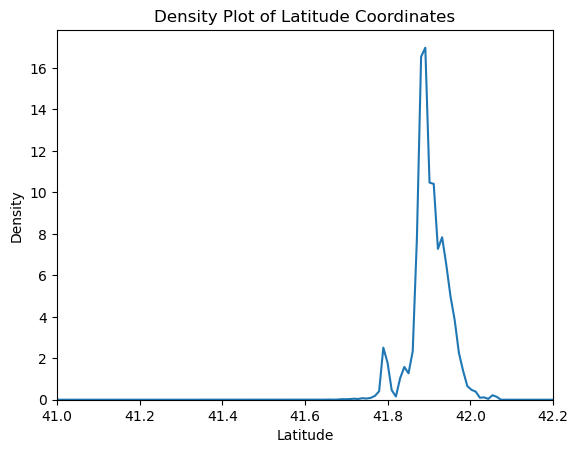

In [214]:
sns.kdeplot(data=df['end_lat']) 

# Set the x-axis limits
plt.xlim(41.000, 42.200)

plt.xlabel('Latitude')
plt.ylabel('Density')
plt.title('Density Plot of Latitude Coordinates')
plt.show()

Need to work on my visualizations, but moving on...

I will drop rows with 'end_lat' above 42.20.

Side quest

In [215]:
def count_decimal_places(df, column_name):
  """
  Counts the number of values in the specified column with 6 or more decimal places.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to check.

  Returns:
    The count of values with 6 or more decimal places.
  """

  # Convert the column to strings
  df['end_lat'] = df['end_lat'].astype(str)

  # Count values with 6 or more decimal places
  count = df['end_lat'].str.split('.').str[1].str.len().ge(6).sum()

  return count

# Example usage:
# Assuming you have a DataFrame named 'df'

count = count_decimal_places(df, 'end_lat')
perc = count/len(df)*100
print(f"Number of values in 'end_lat' with 6 or more decimal places: {count}")
print(f"Percent of values in 'end_lat' with 6 or more decimal places: {perc}")

Number of values in 'end_lat' with 6 or more decimal places: 4222793
Percent of values in 'end_lat' with 6 or more decimal places: 74.40962329404978


In [216]:
def count_decimal_places_low(df, column_name):
  """
  Counts the number of values in the specified column with 3 or less decimal places.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to check.

  Returns:
    The count of values with 6 or more decimal places.
  """

  # Convert the column to strings
  df['end_lat'] = df['end_lat'].astype(str)

  # Count values with 6 or more decimal places
  count = df['end_lat'].str.split('.').str[1].str.len().ge(6).sum()

  return count

# Example usage:
# Assuming you have a DataFrame named 'df'

count = count_decimal_places(df, 'end_lat')
perc = count/len(df)*100
print(f"Number of values in 'end_lat' with 6 or more decimal places: {count}")
print(f"Percent of values in 'end_lat' with 6 or more decimal places: {perc}")

Number of values in 'end_lat' with 6 or more decimal places: 4222793
Percent of values in 'end_lat' with 6 or more decimal places: 74.40962329404978


In [217]:
def count_values_with_less_than_3_decimals(df, column_name):
  """
  Counts the number of values in the specified column with less than 3 decimal places.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to check.

  Returns:
    The count of values with less than 3 decimal places.
  """

  # Convert the column to strings
  df['end_lat'] = df['end_lat'].astype(str)

  # Count values with less than 3 decimal places
  count = df['end_lat'].str.split('.').str[1].str.len().lt(3).sum()

  return count

# Example usage:
# Assuming you have a DataFrame named 'df'

count_low = count_values_with_less_than_3_decimals(df, 'end_lat')
perc_low = count_low/len(df)*100

print(f"Number of values in 'end_lat' with less than 3 decimal places: {count_low}")
print(f"Percent of values in 'end_lat' with less than 3 decimal places: {perc_low}")

Number of values in 'end_lat' with less than 3 decimal places: 1066744
Percent of values in 'end_lat' with less than 3 decimal places: 18.797042429308714


Almost 19% of the dataset only has 2 decimal places in the 'end_lat' coordinate. This is too high to drop, so I wil lleave as is. 

Convert 'end_lat' dtype back to object

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5675063 entries, 0 to 5682195
Data columns (total 11 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   started_at     datetime64[ns] 
 3   ended_at       datetime64[ns] 
 4   start_lat      float64        
 5   start_lng      float64        
 6   end_lat        object         
 7   end_lng        float64        
 8   member_casual  object         
 9   ride_length    timedelta64[ns]
 10  day_of_week    object         
dtypes: datetime64[ns](2), float64(3), object(5), timedelta64[ns](1)
memory usage: 519.6+ MB


In [219]:
df['end_lat'] = df['end_lat'].astype('float64')

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5675063 entries, 0 to 5682195
Data columns (total 11 columns):
 #   Column         Dtype          
---  ------         -----          
 0   ride_id        object         
 1   rideable_type  object         
 2   started_at     datetime64[ns] 
 3   ended_at       datetime64[ns] 
 4   start_lat      float64        
 5   start_lng      float64        
 6   end_lat        float64        
 7   end_lng        float64        
 8   member_casual  object         
 9   ride_length    timedelta64[ns]
 10  day_of_week    object         
dtypes: datetime64[ns](2), float64(4), object(4), timedelta64[ns](1)
memory usage: 519.6+ MB


Continuing on with validation!

Column7: 'end_lng'

In [221]:
# Find the minimum and maximum values in the 'end_lat' column
min_end_lng = df['end_lng'].min()
max_end_lng = df['end_lng'].max()

print(min_end_lng)
print(max_end_lng)

-89.79
-81.69


Count number of rows in 'end_lat' column with values outside of range -87.00 to -89.00